In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [6]:
file_csv = "data/classify.csv"
rf_df = pd.read_csv(file_csv, encoding="ISO-8859-1")
rf_df.head()

,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,NewMarkDown1,NewMarkDown2,NewMarkDown3,NewMarkDown4,NewMarkDown5
0,0,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
1,0,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
2,0,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
3,0,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
4,0,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1


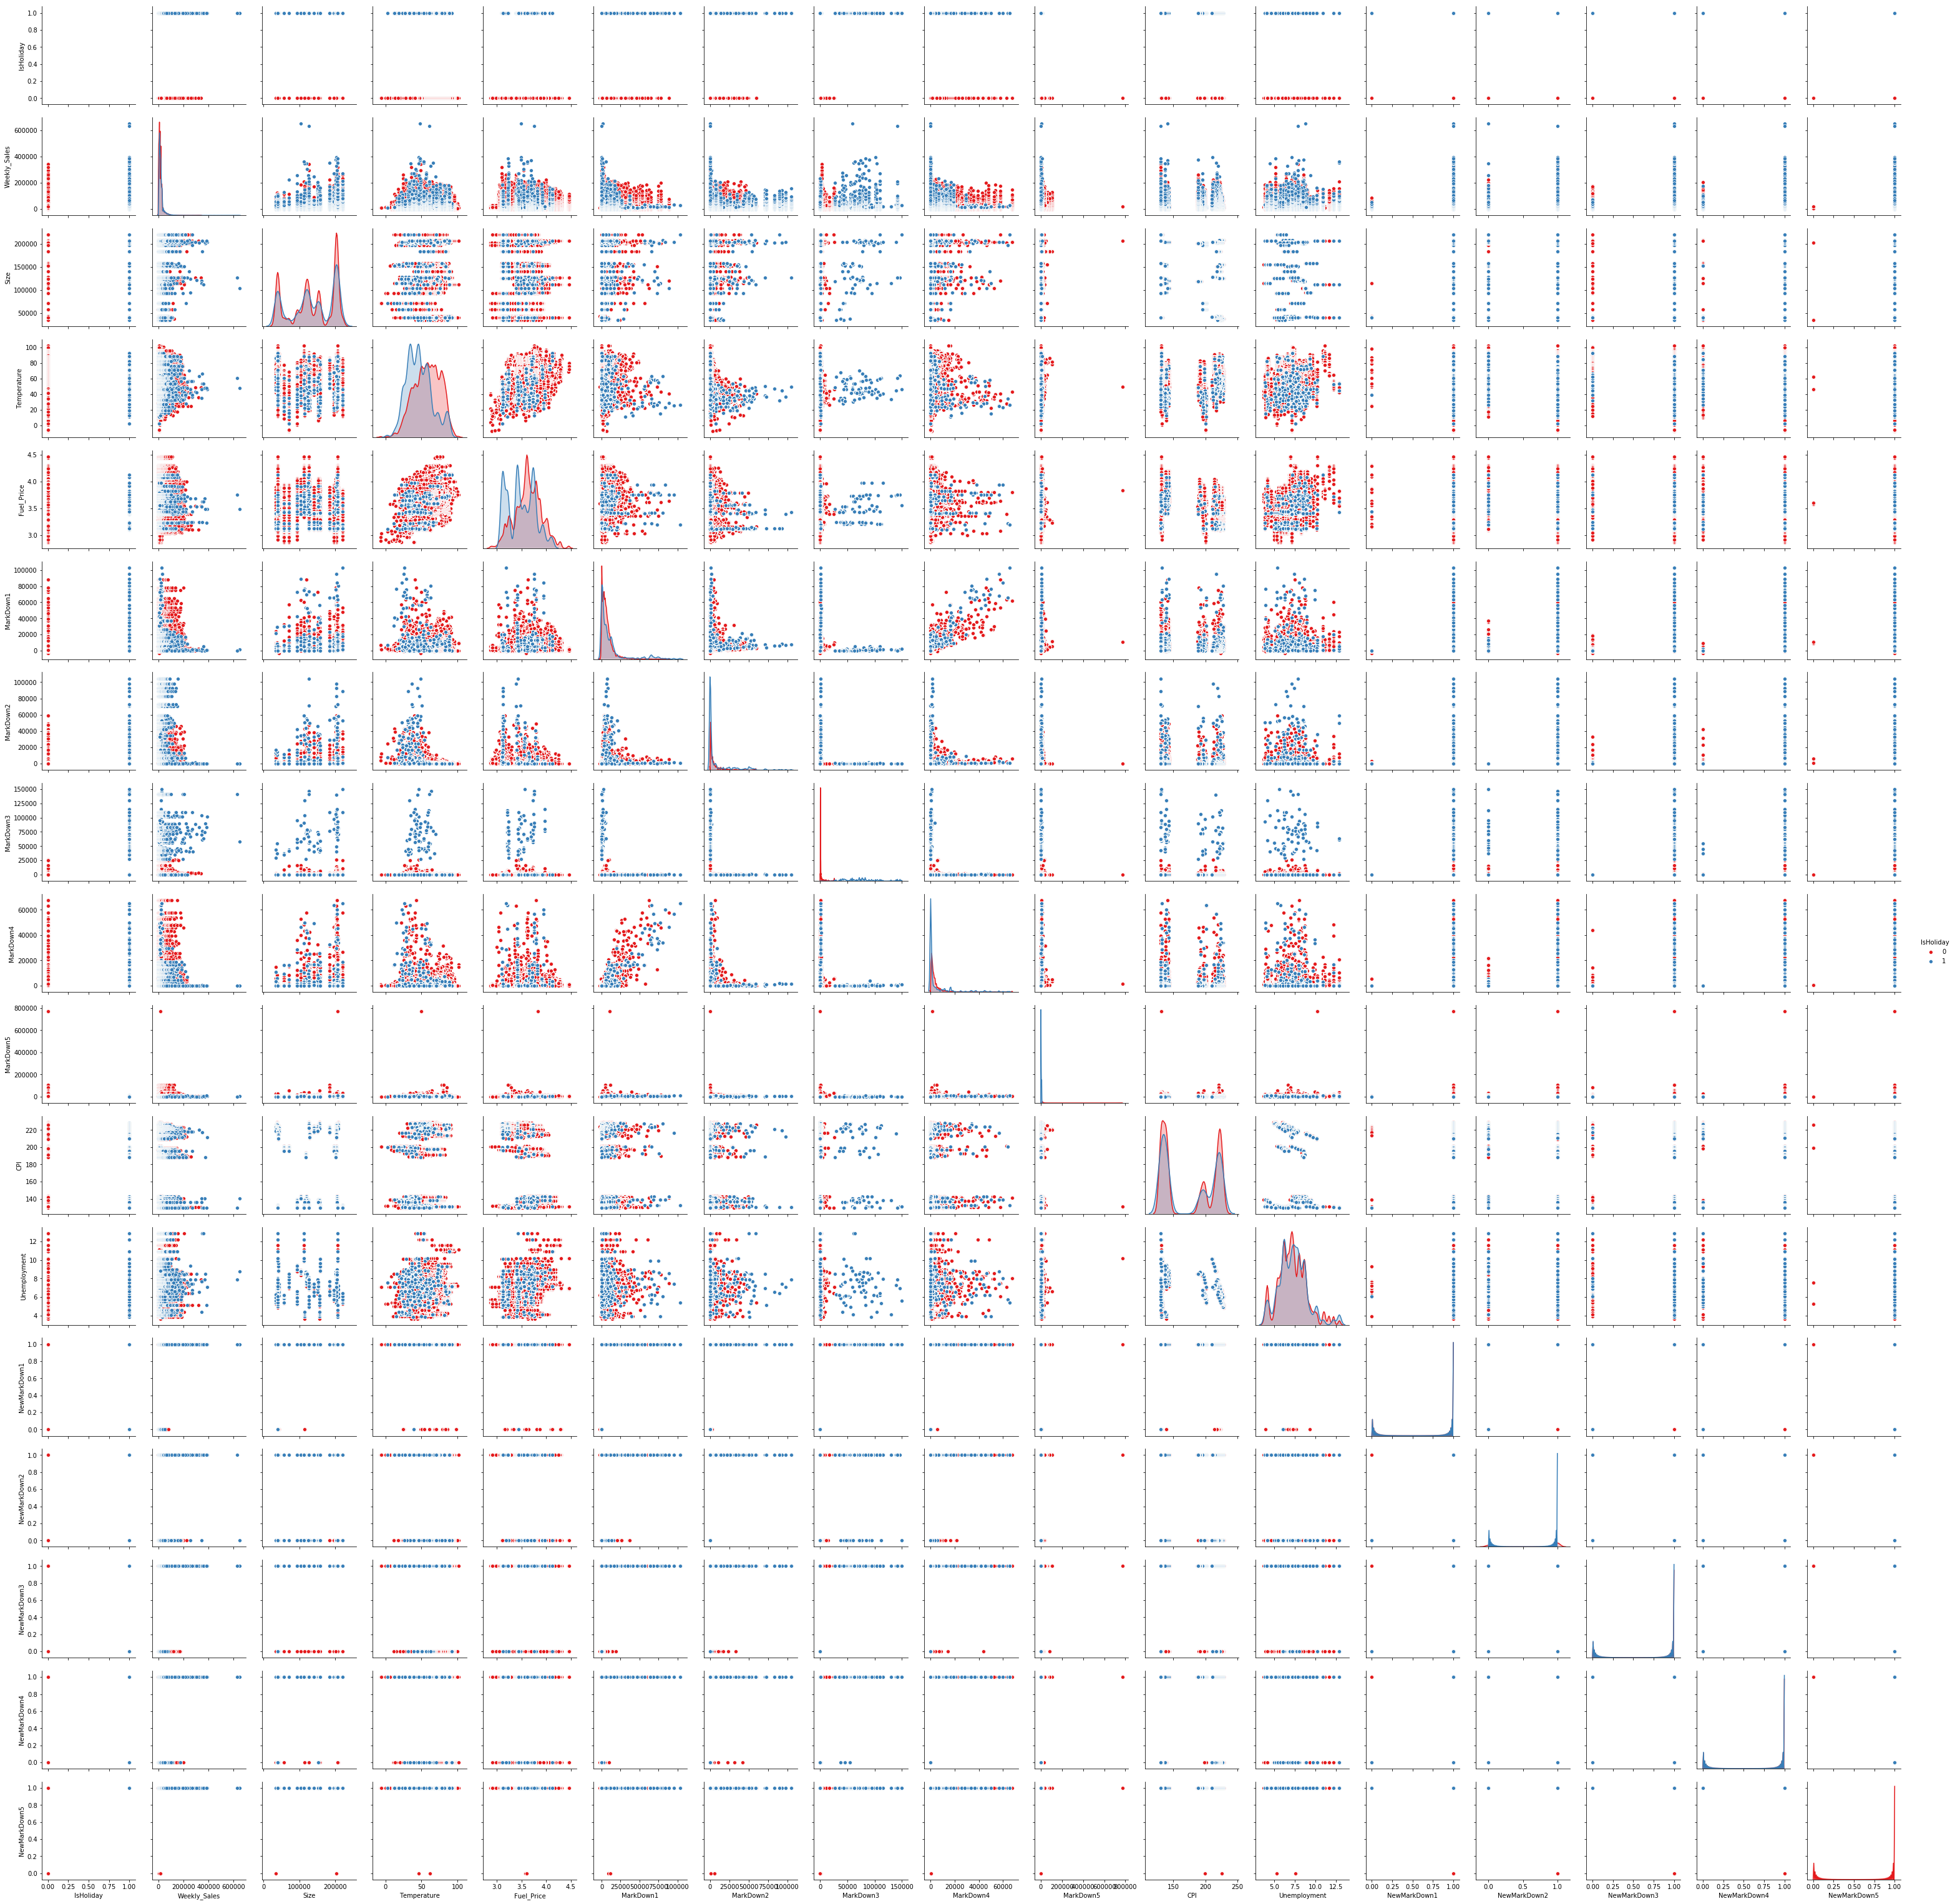

In [7]:
sns.pairplot(rf_df,hue='IsHoliday',palette='Set1')

In [8]:
X = rf_df.loc[:, rf_df.columns != 'IsHoliday']
X.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,NewMarkDown1,NewMarkDown2,NewMarkDown3,NewMarkDown4,NewMarkDown5
0,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
1,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
2,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
3,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1
4,9137.035816,125833,66.36,3.451,1769.37,0.0,97.1,0.0,3594.24,228.976456,4.893,1,0,1,0,1


In [9]:
y = rf_df['IsHoliday'].to_frame()
y.head()

,IsHoliday
0,0
1,0
2,0
3,0
4,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
predictions = dtree.predict(X_test)

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73628
           1       1.00      1.00      1.00      6321

   micro avg       1.00      1.00      1.00     79949
   macro avg       1.00      1.00      1.00     79949
weighted avg       1.00      1.00      1.00     79949



In [15]:
print(confusion_matrix(y_test,predictions))

[[73628     0]
 [    0  6321]]


In [16]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
print(confusion_matrix(y_test,rfc_pred))

[[73628     0]
 [    0  6321]]


In [19]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73628
           1       1.00      1.00      1.00      6321

   micro avg       1.00      1.00      1.00     79949
   macro avg       1.00      1.00      1.00     79949
weighted avg       1.00      1.00      1.00     79949



In [20]:
MAE = mean_absolute_error(y_test,rfc_pred)
print(MAE)

0.0
